# Model Training and Selection

This notebook furthur processes the data to match specific requirements of difrent models.Various models are explored and evaluated and feature engineering is also carried out on the clean dataset

In [1]:
#Import the neccesary libraries
import warnings
warnings.filterwarnings('ignore')
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gr
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [2]:
df = pd.read_csv("processed.csv", parse_dates=['date'], index_col='date')
df =df.asfreq('D')
df =df[["quantity"]]
df.head()

,quantity
date,
2009-12-01,26434.0
2009-12-02,31938.0
2009-12-03,50898.0
2009-12-04,21405.0
2009-12-05,5119.0


In [3]:
print("Merged max :",  df.index.max())
print("Merged min :",  df.index.min())

## Model 1 : SARIMAX

## Model 2 and 3 : ARIMA & SES

C:\Users\David\Documents\GitHub\smart-retail\ISO 2.0\backend\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ARIMA MAE: 9783.555384994073, ARIMA MAPE: 0.4401294301919822
Exponential Smoothing MAE: 9095.646933251746, Exponential Smoothing MAPE: 0.44068438219689066


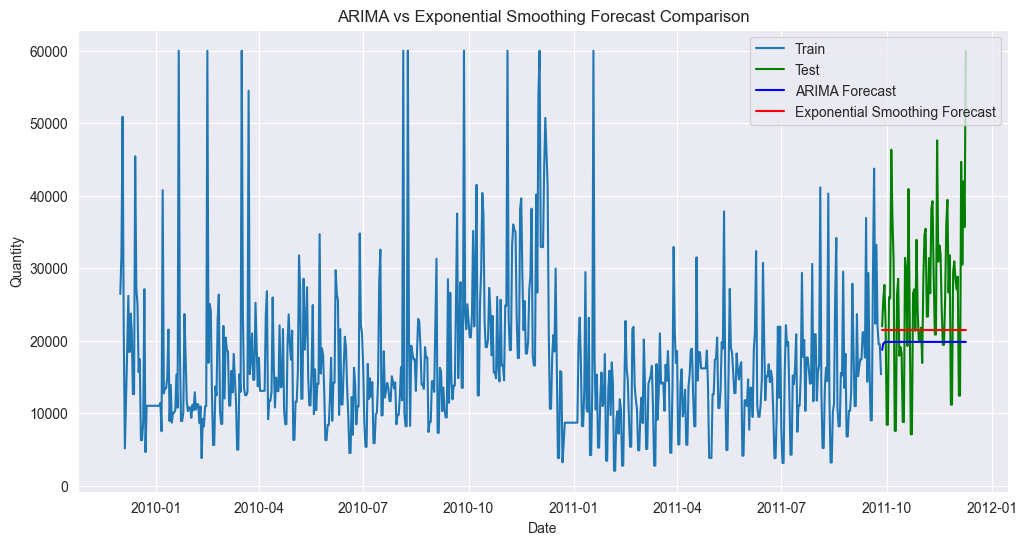

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


# ARIMA Model
def fit_arima(train_data, order):
    model = ARIMA(train_data, order=order)
    fit_model = model.fit()
    return fit_model

# Exponential Smoothing (Simple Exponential Smoothing)
def fit_exponential_smoothing(train_data):
    model = SimpleExpSmoothing(train_data)
    fit_model = model.fit()
    return fit_model

# Forecasting and Evaluation Function
def forecast_and_evaluate(model, test_data):
    forecast_values = model.forecast(len(test_data))
    mae = mean_absolute_error(test_data, forecast_values)
    mape = mean_absolute_percentage_error(test_data, forecast_values)
    return forecast_values, mae, mape

# Fit ARIMA model
arima_model = fit_arima(train['quantity'], order=(1, 1, 1))

# Fit Exponential Smoothing model
exp_smoothing_model = fit_exponential_smoothing(train['quantity'])

# Forecast and evaluate ARIMA
arima_forecast, arima_mae, arima_mape = forecast_and_evaluate(arima_model, test['quantity'])

# Forecast and evaluate Exponential Smoothing
exp_smoothing_forecast, exp_smoothing_mae, exp_smoothing_mape = forecast_and_evaluate(exp_smoothing_model, test['quantity'])

# Print results
print(f'ARIMA MAE: {arima_mae}, ARIMA MAPE: {arima_mape}')
print(f'Exponential Smoothing MAE: {exp_smoothing_mae}, Exponential Smoothing MAPE: {exp_smoothing_mape}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['quantity'], label='Train')
plt.plot(test.index, test['quantity'], label='Test', color='green')

# Plot ARIMA forecast
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')

# Plot Exponential Smoothing forecast
plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA vs Exponential Smoothing Forecast Comparison')
plt.legend()
plt.show();

In [15]:
df.head()

,quantity,is_public_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,...,week_of_year,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,2,2009,1,0,0,0,1,0.781831,0.623490
2009-12-02,31938.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,3,2009,2,0,0,0,1,0.974928,-0.222521
2009-12-03,50898.0,0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,4,2009,3,0,0,0,1,0.433884,-0.900969
2009-12-04,21405.0,0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,5,2009,4,0,0,0,1,-0.433884,-0.900969
2009-12-05,5119.0,0,21405.0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,6,2009,5,0,0,0,1,-0.974928,-0.222521


In [16]:
x = df.copy()

In [14]:
df = x.copy()

In [17]:
import holidays
# Function to create date features
def create_date_features(data):
    data["month"] = data.index.month
    data["day_of_month"] = data.index.day
    data["is_month_start"] = data.index.is_month_start.astype(int)
    data["is_month_end"] = data.index.is_month_end.astype(int)
    data["day_of_year"] = data.index.dayofyear
    data["week_of_year"] = data.index.isocalendar().week
    data["day_of_week"] = data.index.dayofweek + 1
    data["year"] = data.index.year
    data["is_weekend"] = data.index.weekday
    data['is_spring'] = data['month'].isin([3, 4, 5]).astype(int)
    data['is_summer'] = data['month'].isin([6, 7, 8]).astype(int)
    data['is_fall'] = data['month'].isin([9, 10, 11]).astype(int)
    data['is_winter'] = data['month'].isin([12, 1, 2]).astype(int)
    data['sin_day'] = np.sin(2 * np.pi * data.index.dayofweek / 7)
    data['cos_day'] = np.cos(2 * np.pi * data.index.dayofweek / 7)
    return data

In [18]:
#Add holidays
 # Determine public holidays
holiday = holidays.UK()
df['is_public_holiday'] = df.index.map(lambda x: 1 if x in holiday else 0)
def create_lag_and_window_features(data, target_col):
    """
    Create lag and window features for a given DataFrame and target column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    target_col (str): The name of the target column to create features for.

    Returns:
    pd.DataFrame: DataFrame with lag and window features.
    """
    # Create lag features for the past week
    for i in range(1, 8):
        data[f'lag_{i}'] = data[target_col].shift(i)

    # Rolling window statistics for 7 days
    data['rolling_mean_7'] = data[target_col].rolling(window=7).mean()
    data['rolling_sum_7'] = data[target_col].rolling(window=7).sum()
    data['rolling_std_7'] = data[target_col].rolling(window=7).std()

    # Rolling window statistics for 30 days
    data['rolling_mean_30'] = data[target_col].rolling(window=30).mean()
    data['rolling_sum_30'] = data[target_col].rolling(window=30).sum()
    data['rolling_std_30'] = data[target_col].rolling(window=30).std()

    # Expanding window statistics
    data['expanding_sum'] = data[target_col].expanding().sum()

    return data

df = create_lag_and_window_features(df, 'quantity')
df.head(5)

,quantity,is_public_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,...,week_of_year,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49,2,2009,1,0,0,0,1,0.781831,0.623490
2009-12-02,31938.0,0,26434.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49,3,2009,2,0,0,0,1,0.974928,-0.222521
2009-12-03,50898.0,0,31938.0,26434.0,NaN,NaN,NaN,NaN,NaN,NaN,...,49,4,2009,3,0,0,0,1,0.433884,-0.900969
2009-12-04,21405.0,0,50898.0,31938.0,26434.0,NaN,NaN,NaN,NaN,NaN,...,49,5,2009,4,0,0,0,1,-0.433884,-0.900969
2009-12-05,5119.0,0,21405.0,50898.0,31938.0,26434.0,NaN,NaN,NaN,NaN,...,49,6,2009,5,0,0,0,1,-0.974928,-0.222521


In [19]:
# Fill any remaining NaN values
df = df.fillna(method='bfill')
# Set winsorization threshold
threshold = 60000

# Winsorize the 'quantity' column
df['quantity'] = df['quantity'].where(df['quantity'] <= threshold, threshold)
df.head(5)

,quantity,is_public_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,...,week_of_year,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,2,2009,1,0,0,0,1,0.781831,0.623490
2009-12-02,31938.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,3,2009,2,0,0,0,1,0.974928,-0.222521
2009-12-03,50898.0,0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,4,2009,3,0,0,0,1,0.433884,-0.900969
2009-12-04,21405.0,0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,5,2009,4,0,0,0,1,-0.433884,-0.900969
2009-12-05,5119.0,0,21405.0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,6,2009,5,0,0,0,1,-0.974928,-0.222521


In [7]:
import holidays
# Function to create date features
def create_date_features(data):
    data["month"] = data.index.month
    data["day_of_month"] = data.index.day
    data["is_month_start"] = data.index.is_month_start.astype(int)
    data["is_month_end"] = data.index.is_month_end.astype(int)
    data["day_of_year"] = data.index.dayofyear
    data["week_of_year"] = data.index.isocalendar().week
    data["day_of_week"] = data.index.dayofweek + 1
    data["year"] = data.index.year
    data["is_weekend"] = data.index.weekday
    data['is_spring'] = data['month'].isin([3, 4, 5]).astype(int)
    data['is_summer'] = data['month'].isin([6, 7, 8]).astype(int)
    data['is_fall'] = data['month'].isin([9, 10, 11]).astype(int)
    data['is_winter'] = data['month'].isin([12, 1, 2]).astype(int)
    data['sin_day'] = np.sin(2 * np.pi * data.index.dayofweek / 7)
    data['cos_day'] = np.cos(2 * np.pi * data.index.dayofweek / 7)
    return data

df = create_date_features(df)
 # Determine public holidays
holiday = holidays.UK()
df['is_public_holiday'] = df.index.map(lambda x: 1 if x in holiday else 0)
def create_lag_and_window_features(data, target_col):
    """
    Create lag and window features for a given DataFrame and target column.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame.
    target_col (str): The name of the target column to create features for.

    Returns:
    pd.DataFrame: DataFrame with lag and window features.
    """
    # Create lag features for the past week
    for i in range(1, 8):
        data[f'lag_{i}'] = data[target_col].shift(i)

    # Rolling window statistics for 7 days
    data['rolling_mean_7'] = data[target_col].rolling(window=7).mean()
    data['rolling_sum_7'] = data[target_col].rolling(window=7).sum()
    data['rolling_std_7'] = data[target_col].rolling(window=7).std()

    # Rolling window statistics for 30 days
    data['rolling_mean_30'] = data[target_col].rolling(window=30).mean()
    data['rolling_sum_30'] = data[target_col].rolling(window=30).sum()
    data['rolling_std_30'] = data[target_col].rolling(window=30).std()

    # Expanding window statistics
    data['expanding_sum'] = data[target_col].expanding().sum()

    return data

df = create_lag_and_window_features(df, 'quantity')


# Fill any remaining NaN values
df = df.fillna(method='bfill')

# Set winsorization threshold
threshold = 60000

# Winsorize the 'quantity' column
df['quantity'] = df['quantity'].where(df['quantity'] <= threshold, threshold)
df.head(5)



,quantity,is_public_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,...,week_of_year,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,2,2009,1,0,0,0,1,0.781831,0.623490
2009-12-02,31938.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,3,2009,2,0,0,0,1,0.974928,-0.222521
2009-12-03,50898.0,0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,4,2009,3,0,0,0,1,0.433884,-0.900969
2009-12-04,21405.0,0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,5,2009,4,0,0,0,1,-0.433884,-0.900969
2009-12-05,5119.0,0,21405.0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,49,6,2009,5,0,0,0,1,-0.974928,-0.222521


In [8]:
import pandas as pd
import numpy as np
import holidays

def create_date_features(data):
    data["month"] = data['ds'].dt.month
    data["day_of_month"] = data['ds'].dt.day
    data["is_month_start"] = data['ds'].dt.is_month_start.astype(int)
    data["is_month_end"] = data['ds'].dt.is_month_end.astype(int)
    data["day_of_year"] = data['ds'].dt.dayofyear
    data["week_of_year"] = data['ds'].dt.isocalendar().week
    data["day_of_week"] = data['ds'].dt.dayofweek + 1
    data["year"] = data['ds'].dt.year
    data["is_weekend"] = (data['ds'].dt.weekday >= 5).astype(int)
    data['is_spring'] = data['month'].isin([3, 4, 5]).astype(int)
    data['is_summer'] = data['month'].isin([6, 7, 8]).astype(int)
    data['is_fall'] = data['month'].isin([9, 10, 11]).astype(int)
    data['is_winter'] = data['month'].isin([12, 1, 2]).astype(int)
    data['sin_day'] = np.sin(2 * np.pi * data['ds'].dt.dayofweek / 7)
    data['cos_day'] = np.cos(2 * np.pi * data['ds'].dt.dayofweek / 7)
    return data

def create_lag_and_window_features(data, target_col):
    for i in range(1, 8):
        data[f'lag_{i}'] = data[target_col].shift(i)

    data['rolling_mean_7'] = data[target_col].rolling(window=7).mean()
    data['rolling_sum_7'] = data[target_col].rolling(window=7).sum()
    data['rolling_std_7'] = data[target_col].rolling(window=7).std()

    data['rolling_mean_30'] = data[target_col].rolling(window=30).mean()
    data['rolling_sum_30'] = data[target_col].rolling(window=30).sum()
    data['rolling_std_30'] = data[target_col].rolling(window=30).std()

    data['expanding_sum'] = data[target_col].expanding().sum()

    return data

def preprocess_data(df):
    df = df.copy()

    # Ensure 'ds' column is datetime
    df['ds'] = df.index
    df['ds'] = pd.to_datetime(df['ds'])

    # Create date features
    df = create_date_features(df)

    # Determine public holidays
    holiday = holidays.UK()
    df['is_public_holiday'] = df['ds'].apply(lambda x: 1 if x in holiday else 0)

    # Create lag and window features
    df = create_lag_and_window_features(df, 'quantity')

    # Fill any remaining NaN values
    df = df.fillna(method='bfill')

    # Set winsorization threshold
    threshold = 60000

    # Winsorize the 'quantity' column
    df['quantity'] = df['quantity'].where(df['quantity'] <= threshold, threshold)

    return df

In [11]:
b = preprocess_data(df)
b.head()

,quantity,is_public_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean_7,...,day_of_week,year,is_weekend,is_spring,is_summer,is_fall,is_winter,sin_day,cos_day,ds
date,,,,,,,,,,,,,,,,,,,,,
2009-12-01,26434.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,2,2009,0,0,0,0,1,0.781831,0.623490,2009-12-01
2009-12-02,31938.0,0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,3,2009,0,0,0,0,1,0.974928,-0.222521,2009-12-02
2009-12-03,50898.0,0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,4,2009,0,0,0,0,1,0.433884,-0.900969,2009-12-03
2009-12-04,21405.0,0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,5,2009,0,0,0,0,1,-0.433884,-0.900969,2009-12-04
2009-12-05,5119.0,0,21405.0,50898.0,31938.0,26434.0,26434.0,26434.0,26434.0,23710.571429,...,6,2009,1,0,0,0,1,-0.974928,-0.222521,2009-12-05


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3689
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 29
[LightGBM] [Info] Start training from score 16927.753173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

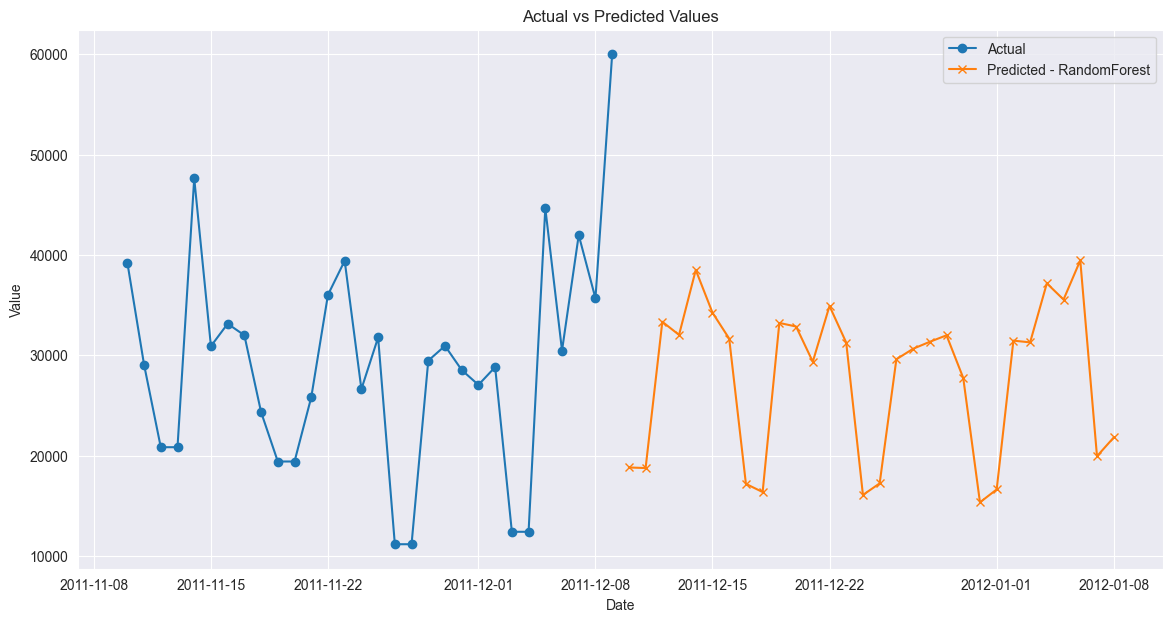

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import holidays

# Make a copy of the dataframe
rml_data = b.copy()

# Ensure 'ds' column is datetime
# rml_data['ds'] = rml_data.index
# rml_data['ds'] = pd.to_datetime(rml_data['ds'])
rml_data['y'] = rml_data['quantity']

# Define features and target
features = ['month', 'day_of_month', 'is_month_start', 'is_month_end',
            'day_of_year', 'week_of_year', 'day_of_week', 'year',
            'is_weekend', 'is_spring', 'is_summer', 'is_fall', 'is_winter',
            'sin_day', 'cos_day', 'is_public_holiday', 'lag_1', 'lag_2', 
            'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean_7', 
            'rolling_sum_7', 'rolling_std_7', 'rolling_mean_30', 
            'rolling_sum_30', 'rolling_std_30', 'expanding_sum']

target = 'y'

# Split the data into train and test sets
train_df = rml_data[:-30]
test_df = rml_data[-30:]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Define the models and hyperparameters for tuning
models = {
    'LightGBM': (lgb.LGBMRegressor(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 127]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    }),
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20]
    })
}

# Initialize lists to store the scores
mae_scores = {}
mape_scores = {}

# Train and evaluate each model
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    mae_scores[model_name] = mae
    mape_scores[model_name] = mape
    
    print(f"{model_name} - MAE: {mae:.4f}, MAPE: {mape:.4%}")

# Select the best model based on MAPE
best_model_name = min(mape_scores, key=mape_scores.get)
best_model = models[best_model_name][0]
print(f"\nThe best model is {best_model_name} with a MAPE of {mape_scores[best_model_name]:.4%}")

# Retrain the best model on the entire dataset
best_model.fit(rml_data[features], rml_data[target])

# Predict the next 30 days
future_dates = pd.date_range(start=rml_data['ds'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({
    'ds': future_dates,
    'month': future_dates.month,
    'day_of_month': future_dates.day,
    'is_month_start': future_dates.is_month_start.astype(int),
    'is_month_end': future_dates.is_month_end.astype(int),
    'day_of_year': future_dates.dayofyear,
    'week_of_year': future_dates.isocalendar().week,
    'day_of_week': future_dates.dayofweek + 1,
    'year': future_dates.year,
    'is_weekend': (future_dates.weekday >= 5).astype(int),
    'is_spring': future_dates.month.isin([3, 4, 5]).astype(int),
    'is_summer': future_dates.month.isin([6, 7, 8]).astype(int),
    'is_fall': future_dates.month.isin([9, 10, 11]).astype(int),
    'is_winter': future_dates.month.isin([12, 1, 2]).astype(int),
    'sin_day': np.sin(2 * np.pi * future_dates.dayofweek / 7),
    'cos_day': np.cos(2 * np.pi * future_dates.dayofweek / 7)
})

# Add public holidays for the future dates
uk_holidays = holidays.UK()
future_df['is_public_holiday'] = future_df['ds'].apply(lambda date: 1 if date in uk_holidays else 0)

# Add lag features and rolling statistics for the future_df
for lag in range(1, 8):
    future_df[f'lag_{lag}'] = rml_data[target].shift(lag).iloc[-30:].values

for window in [7, 30]:
    future_df[f'rolling_mean_{window}'] = rml_data[target].rolling(window=window).mean().iloc[-30:].values
    future_df[f'rolling_sum_{window}'] = rml_data[target].rolling(window=window).sum().iloc[-30:].values
    future_df[f'rolling_std_{window}'] = rml_data[target].rolling(window=window).std().iloc[-30:].values

future_df['expanding_sum'] = rml_data[target].expanding().sum().iloc[-30:].values

# Predict future values using the best model
future_predictions = best_model.predict(future_df[features])

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(test_df['ds'], test_df['y'], label='Actual', marker='o')
plt.plot(future_df['ds'], future_predictions, label=f'Predicted - {best_model_name}', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3689
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 29
[LightGBM] [Info] Start training from score 16927.753173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

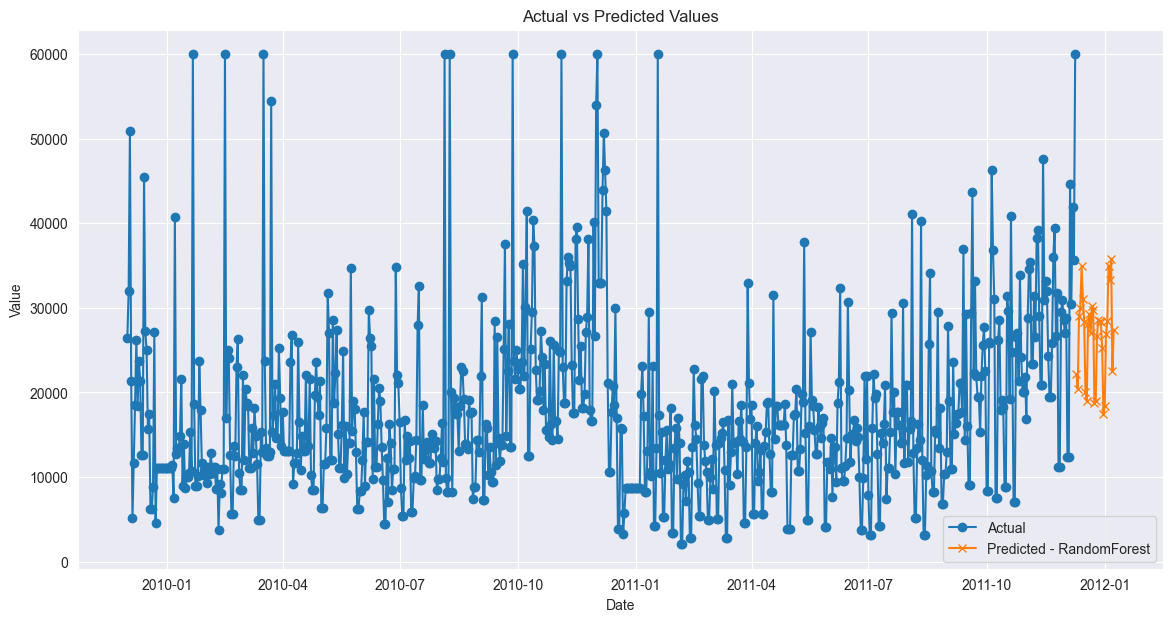

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import holidays

# Make a copy of the dataframe
rml_data = b.copy()

# Ensure 'ds' column is datetime
rml_data['ds'] = pd.to_datetime(rml_data['ds'])
rml_data['y'] = rml_data['quantity']

# Define features and target
features = ['month', 'day_of_month', 'is_month_start', 'is_month_end',
            'day_of_year', 'week_of_year', 'day_of_week', 'year',
            'is_weekend', 'is_spring', 'is_summer', 'is_fall', 'is_winter',
            'sin_day', 'cos_day', 'is_public_holiday', 'lag_1', 'lag_2', 
            'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean_7', 
            'rolling_sum_7', 'rolling_std_7', 'rolling_mean_30', 
            'rolling_sum_30', 'rolling_std_30', 'expanding_sum']

target = 'y'

# Split the data into train and test sets
train_df = rml_data[:-30]
test_df = rml_data[-30:]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Define the models and hyperparameters for tuning
models = {
    'LightGBM': (lgb.LGBMRegressor(), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 127]
    }),
    'XGBoost': (XGBRegressor(objective='reg:squarederror'), {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6]
    }),
    'RandomForest': (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20]
    })
}

# Initialize lists to store the scores
mae_scores = {}
mape_scores = {}
best_params = {}

# Train and evaluate each model
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    mae_scores[model_name] = mae
    mape_scores[model_name] = mape
    
    print(f"{model_name} - Best Params: {grid_search.best_params_}")
    print(f"{model_name} - MAE: {mae:.4f}, MAPE: {mape:.4%}")

# Select the best model based on MAPE
best_model_name = min(mape_scores, key=mape_scores.get)
best_model = models[best_model_name][0]
print(f"\nThe best model is {best_model_name} with a MAPE of {mape_scores[best_model_name]:.4%}")
print(f"Best Hyperparameters: {best_params[best_model_name]}")

# Retrain the best model on the entire dataset
best_model.set_params(**best_params[best_model_name])
best_model.fit(rml_data[features], rml_data[target])

# Predict the next 30 days
future_dates = pd.date_range(start=rml_data['ds'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({
    'ds': future_dates,
    'month': future_dates.month,
    'day_of_month': future_dates.day,
    'is_month_start': future_dates.is_month_start.astype(int),
    'is_month_end': future_dates.is_month_end.astype(int),
    'day_of_year': future_dates.dayofyear,
    'week_of_year': future_dates.isocalendar().week,
    'day_of_week': future_dates.dayofweek + 1,
    'year': future_dates.year,
    'is_weekend': (future_dates.weekday >= 5).astype(int),
    'is_spring': future_dates.month.isin([3, 4, 5]).astype(int),
    'is_summer': future_dates.month.isin([6, 7, 8]).astype(int),
    'is_fall': future_dates.month.isin([9, 10, 11]).astype(int),
    'is_winter': future_dates.month.isin([12, 1, 2]).astype(int),
    'sin_day': np.sin(2 * np.pi * future_dates.dayofweek / 7),
    'cos_day': np.cos(2 * np.pi * future_dates.dayofweek / 7)
})

# Add public holidays for the future dates
uk_holidays = holidays.UK()
future_df['is_public_holiday'] = future_df['ds'].apply(lambda date: 1 if date in uk_holidays else 0)

# Add lag features and rolling statistics for the future_df
for lag in range(1, 8):
    future_df[f'lag_{lag}'] = rml_data[target].shift(lag).iloc[-30:].values

for window in [7, 30]:
    future_df[f'rolling_mean_{window}'] = rml_data[target].rolling(window=window).mean().iloc[-30:].values
    future_df[f'rolling_sum_{window}'] = rml_data[target].rolling(window=window).sum().iloc[-30:].values
    future_df[f'rolling_std_{window}'] = rml_data[target].rolling(window=window).std().iloc[-30:].values

future_df['expanding_sum'] = rml_data[target].expanding().sum().iloc[-30:].values

# Predict future values using the best model
future_predictions = best_model.predict(future_df[features])

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(rml_data['ds'], rml_data['y'], label='Actual', marker='o')
plt.plot(future_df['ds'], future_predictions, label=f'Predicted - {best_model_name}', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


MAPE: 13.6114%


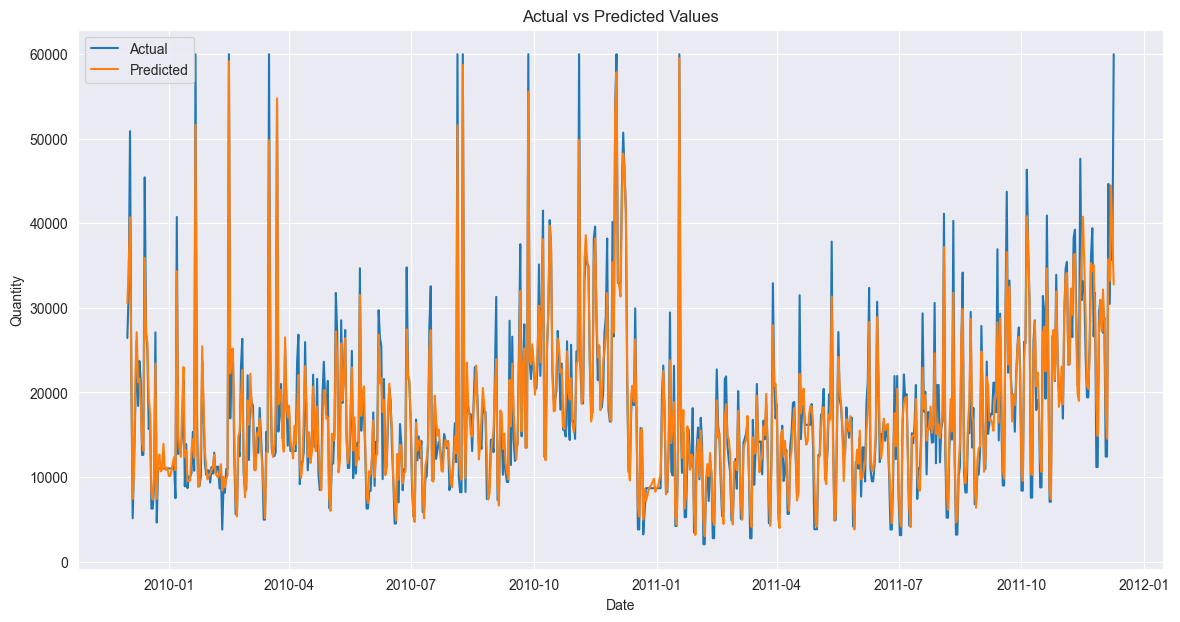

Best Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3}


In [14]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import holidays

# Make a copy of the dataframe
rml_data = b.copy()

# Ensure 'ds' column is datetime
rml_data['ds'] = pd.to_datetime(rml_data['ds'])
rml_data['y'] = rml_data['quantity']

# Define features and target
features = ['month', 'day_of_month', 'is_month_start', 'is_month_end',
            'day_of_year', 'week_of_year', 'day_of_week', 'year',
            'is_weekend', 'is_spring', 'is_summer', 'is_fall', 'is_winter',
            'sin_day', 'cos_day', 'is_public_holiday', 'lag_1', 'lag_2', 
            'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'rolling_mean_7', 
            'rolling_sum_7', 'rolling_std_7', 'rolling_mean_30', 
            'rolling_sum_30', 'rolling_std_30', 'expanding_sum']

target = 'y'

# Split the data into train and test sets
train_df = rml_data[:-30]
test_df = rml_data[-30:]

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]

# Define the best parameters for the XGBoost model
best_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 3
}

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(objective='reg:squarederror', **best_params)
best_model.fit(X_train, y_train)

# Predict the entire historical period
predictions = best_model.predict(rml_data[features])

# Calculate MAPE for the predictions
mape = mean_absolute_percentage_error(rml_data[target], predictions)
print(f"MAPE: {mape:.4%}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))

# Plot the actual values
plt.plot(rml_data['ds'], rml_data['y'], label='Actual')

# Plot the predicted values
plt.plot(rml_data['ds'], predictions, label='Predicted')

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")
